In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.ndimage import gaussian_filter
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Latin Modern Roman"],  # must be installed on your system
    "mathtext.fontset": "cm",             # Computer Modern math, matches LaTeX style
    "text.usetex": True                    # render text via LaTeX
})

In [10]:
# Valencia-9 p Struktur 5-3
file_path_topography = r"../Data/AFM/NiSi_Stückchen/Ni2Si_850_topography.txt"
file_path_current = r"../Data/AFM/NiSi_Stückchen/Ni2Si_850_current.txt"

topography_array = np.loadtxt(file_path_topography, delimiter=None)
current_array = np.loadtxt(file_path_current, delimiter=None)
current_array = current_array * (-1)

In [4]:
physical_width = 5   # x in µm
physical_height = 5  # y in µm

ny, nx = topography_array.shape

x_1d = np.linspace(0, physical_width, nx)
y_1d = np.linspace(physical_height, 0, ny) 

X, Y = np.meshgrid(x_1d, y_1d)

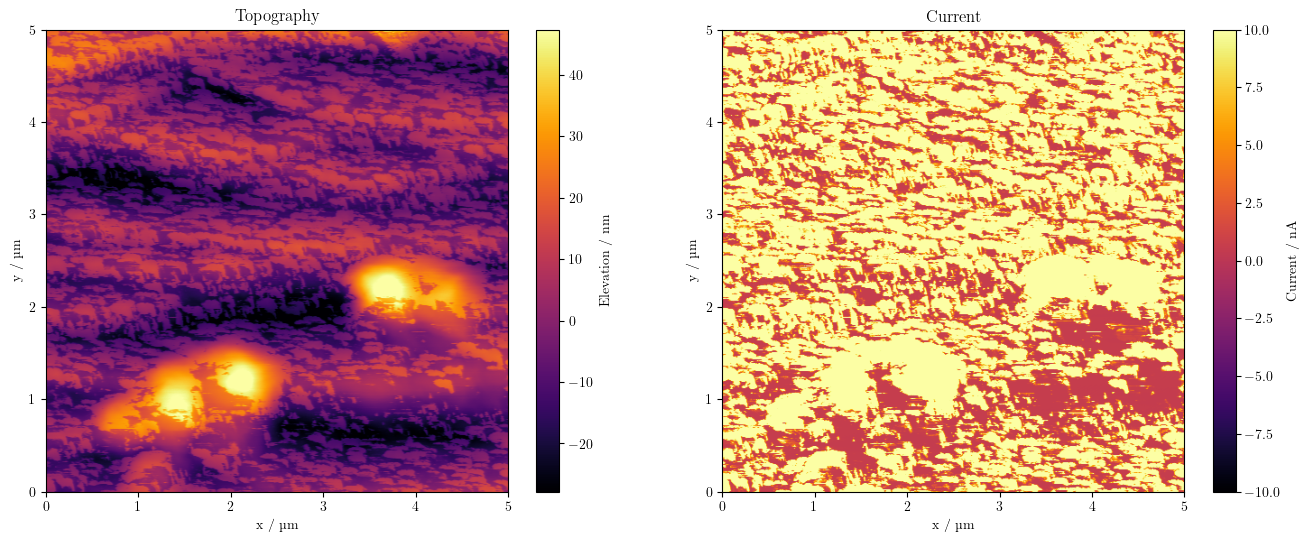

In [11]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
# remove top 1% from colorbar for better contrast
vmax = np.percentile(topography_array, 99.5)   # ignore top 0,5%
vmin = np.percentile(topography_array, 1)    # optiopAl

topography = ax1.imshow(topography_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmin=vmin, vmax=vmax)
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pAd=0.05
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")


ax2 = fig.add_subplot(1,2,2)
current = ax2.imshow(current_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmax=10, vmin=-10)  # plasma inferno Spectral viridis magma
cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
cbar2.set_label('Current / nA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/Valencia_p_Struktur_5-3.pdf', dpi=1000)

### adjusting the colormap scale to match the colorbar on topograpy and current

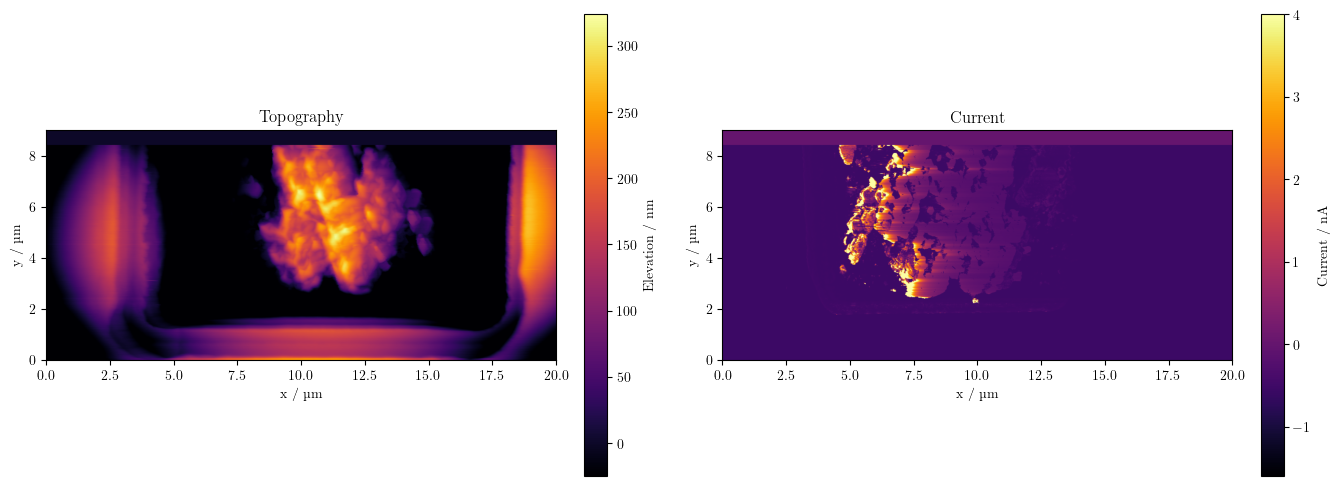

In [11]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)

topography = ax1.imshow(topography_contact, cmap='inferno', extent=[x_min, x_max, y_min, y_max], vmin=-25)  # , vmax=75
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pAd=0.05
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")

ax2 = fig.add_subplot(1,2,2)
current = ax2.imshow(current_contact, cmap='inferno', extent=[x_min, x_max, y_min, y_max], vmin=-1.6, vmax=4)
cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
cbar2.set_label('Current / nA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/EP2_W1_20um_p+.pdf', dpi=500)

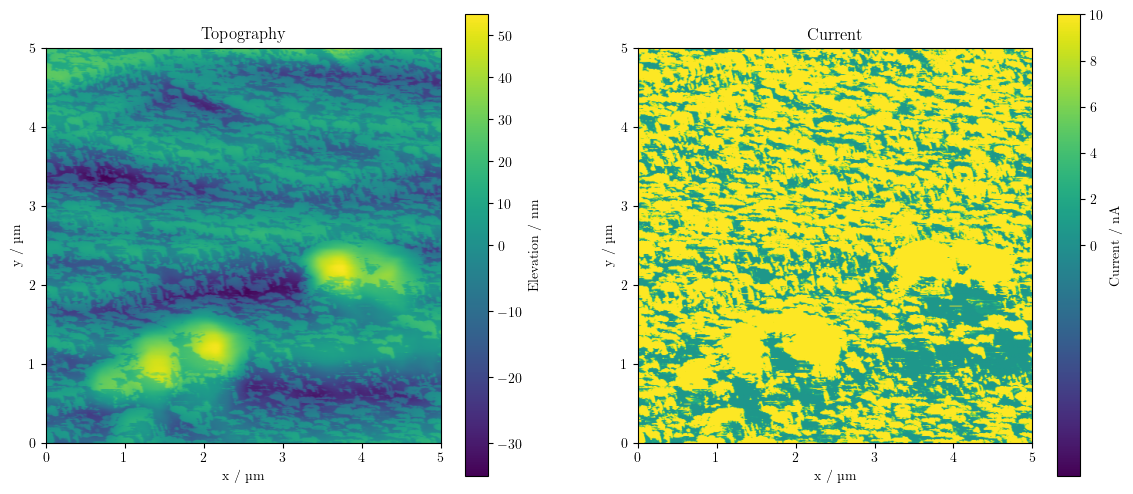

<Figure size 640x480 with 0 Axes>

In [ ]:
norm_topo = mcolors.TwoSlopeNorm(vmin=-35, vcenter=0, vmax=55)
norm_curr = mcolors.TwoSlopeNorm(vmin=-0.1, vcenter=0, vmax=10)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Topography Plot
im1 = ax1.imshow(topography_array, cmap='viridis', norm=norm_topo, extent=[0, physical_width, 0, physical_height])

cbar1 = plt.colorbar(im1, ax=ax1, label='Elevation (nm)')
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")

# Current Plot
im2 = ax2.imshow(current_array, cmap='viridis', norm=norm_curr, extent=[0, physical_width, 0, physical_height])

cbar2 = plt.colorbar(im2, ax=ax2, label='Current (pA)')
cbar2.set_label('Current / nA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/AFM/Ni2Si_850.pdf', dpi=500)

### 3D plots